In [1]:
# -*- coding : utf8 -*-

import os
import json
import re
from textblob_de import TextBlobDE as t
import matplotlib.pyplot as plt
from utils import _flatten_list
from tabulate import tabulate

from textblob_de.taggers import PatternTagger

In [2]:
dict1 = {}
# Listen definieren
# Alexander Kekulé
ak = []
lenak = []
wtypeak = {}
counterak = 0
avglenak = 0
# Camillo Schumann
cs = []
lencs = []
wtypecs = {}
countercs = 0
avglencs = 0
#Jan Kröger 
jk = []
lenjk = []
wtypejk = {}
counterjk = 0
avglenjk = 0
# Iterator
people = ['cs','ak','jk']
mods = ['cs','jk']
scientist = ['ak']
label = []

In [3]:
pathmdr = os.path.join('data','REFINED','mdr')
ldmdr = os.listdir(pathmdr)

In [4]:
for i in range(0,len(ldmdr)):
    path = os.path.join(pathmdr,ldmdr[i])
    if re.search('.json',ldmdr[i]):
        with open(path,'r',encoding='utf-8') as f:
            dict1 = json.load(f)
            for i in dict1['metadata']['speakers']:
                if 'Alexander Kekulé' in dict1['metadata']['speakers']:
                    counterak += 1
                if 'Camillo Schumann' in dict1['metadata']['speakers']:
                    countercs += 1
                if 'Jan Kröger' in dict1['metadata']['speakers']:
                    counterjk += 1
            for key in dict1['content']:
                if dict1['content'][key][0]=='Camillo Schumann':
                    cs.append(dict1['content'][key][1])
                if dict1['content'][key][0]=='Jan Kröger':
                    jk.append(dict1['content'][key][1])
                if dict1['content'][key][0]=='Alexander Kekulé':
                    ak.append(dict1['content'][key][1])

In [5]:
# Länge des Redeanteils
l = []
if len(ak)>1:
    l = ' '.join(ak).split(' ')
    l = _flatten_list(l)
    lenak = len(l)
        
l = []
if len(cs)>1:
    l = ' '.join(cs).split(' ')
    l = _flatten_list(l)
    lencs = len(l)
l = []
if len(jk)>1:
    l = ' '.join(jk).split(' ')
    l = _flatten_list(l)
    lenjk = len(l)

In [6]:
#Durchschnittliche Redelänge
# A.Kekulé
if counterak>1:
    avglenak = lenak/counterak
# Camillo Schumann
if countercs>1:    
    avglencs = lencs/countercs
# Jan Kröger
if counterjk>1:
    avglenjk = lenjk/counterjk

In [7]:
tcs = "\n".join(cs)
tak = "\n".join(ak)
tjk = "\n".join(jk)

[14332.04918032787, 4632.449074074074, 4217.571428571428] ['Alexander Kekulé', 'Camillo Schumann', 'Jan Kröger']


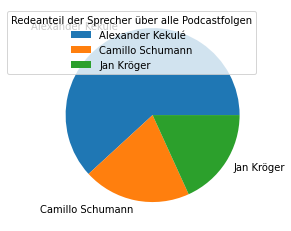

In [8]:
tagger = PatternTagger()
# print(blob.pos_tags)

# Nomen, Adjektive/Adverb, Verben https://pythonexamples.org/nltk-pos-tagging/
# Nomen und Verben / Satz
wak = []
wcs = []
wjk = []
wtak = []
wtcs = []
wtjk = []
partswak = {}
partswcs = {}
partswjk = {}

# Kekulé
blob = t(tak,pos_tagger=tagger)
for tag in blob.pos_tags:
    key = tag[1]
    if key in wtypeak:
        wtypeak[key] += 1
    else:
        wtypeak[key] = 1
for key in wtypeak:
    wak.append(wtypeak[key])
    wtak.append(key)
sumwak = sum(wak) # Summe aller Wörter
for key in wtypeak:
    nv = wtypeak[key]/counterak 
    partswak.update({key:nv}) # Anteil Worttypen

# Schumann        
blob = t(tcs,pos_tagger=tagger)
for tag in blob.pos_tags:
    key = tag[1]
    if key in wtypecs:
        wtypecs[key] += 1
    else:
        wtypecs[key] = 1
for key in wtypecs:
    wcs.append(wtypecs[key])
    wtcs.append(key)
sumwcs = sum(wcs) # Summe aller Wörter
for key in wtypecs:
    nv = wtypecs[key]/countercs
    partswcs.update({key:nv}) # Anteil Worttypen

#Kröger
blob = t(tjk,pos_tagger=tagger)
for tag in blob.pos_tags:
    key = tag[1]
    if key in wtypejk:
        wtypejk[key] += 1
    else:
        wtypejk[key] = 1
for key in wtypejk:
    wjk.append(wtypejk[key])
    wtjk.append(key)
sumwjk = sum(wjk) # Summe aller Wörter
for key in wtypejk:
    nv = wtypejk[key]/counterjk
    partswjk.update({key:nv})

# Ergebnisdoc erzeugen
textkekule = 'Kekulé:\nDurchschnittliche Redelänge: '+str(avglenak)+'Verwendete Worttypen: '+str(wtak)+'So häufig verwendet Kekulé...: '+str(wtypeak)+'also anteilig...:'+str(partswak)
textschumann = 'Schumann:\nDurchschnittliche Redelänge: '+str(avglencs)+'Verwendete Worttypen: '+str(wtcs)+ 'So häufig verwendet Schumann...: '+str(wtypecs)+'also anteilig...:'+str(partswcs)
textkroger = 'Kröger:\nDurchschnittliche Redelänge: '+str(avglenjk)+'Verwendete Worttypen: '+str(wtjk)+'So häufig verwendet Kröger...: '+str(wtypejk)+'also anteilig...:'+str(partswjk)
endresult = textkekule + '\n' + textschumann + '\n' + textkroger 

pathstats = os.path.join('data','STATS')
with open(os.path.join(pathstats,"results_textstats_mdr.txt"),"w",encoding="utf-8") as f:
    f.write(endresult)

# Piechart Redeanteil
avglen = [avglenak,avglencs,avglenjk]
label = ['Alexander Kekulé','Camillo Schumann','Jan Kröger']
print(avglen,label)

plt.pie(avglen,labels=label)
plt.legend(title="Redeanteil der Sprecher über alle Podcastfolgen")
plt.savefig("RedeanteilMDR.svg")